# Distance Prediction

Given the embedding vectors of two nodes(stations), predict the distance between two stations.

In [1]:
import pandas as pd
import networkx as nx
import random
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset Generation

In [2]:
coords = pd.read_csv('../data/coords.csv',index_col=0).T
coords = coords.loc[~coords['lng'].isna(),:]

In [3]:
station = list(coords.index)
pairs = []
for i in range(len(station)):
    for j in range(i+1,len(station)):
        pairs.append([station[i],station[j]])

In [4]:
random.seed(1234)

trainset = random.sample(pairs,3000)
for i in range(len(trainset)):
    pair = trainset[i]
    dist = np.sum((coords.loc[pair[0]].values-coords.loc[pair[1]].values)**2)
    pair.append(np.sqrt(dist))
    trainset[i] = pair
    
testset = random.sample(trainset,500)
trainset = [pair for pair in trainset if pair not in testset]

## Prediction

In [5]:
embedding_path = '../embedding/embedding/'
walk_methods = ['prob_walk_stratified_graph_','prob_walk_whole_graph_',\
               'random_walk_whole_graph_']
dim_space = ['8','16','32','64','128']

In [6]:
def DistancePrediction(walk_method,dim):
    data = pd.read_csv(embedding_path+walk_method+dim+'.csv',index_col=0)
    
    st1 = [pair[0] for pair in trainset]
    st2 = [pair[1] for pair in trainset]
    train_X = np.abs(data.loc[st1].values-data.loc[st2].values)
    train_Y = np.array([pair[2] for pair in trainset])

    st1 = [pair[0] for pair in testset]
    st2 = [pair[1] for pair in testset]
    test_X = np.abs(data.loc[st1].values-data.loc[st2].values)
    test_Y = np.array([pair[2] for pair in testset])
    
    reg = LinearRegression()
    reg.fit(train_X,train_Y)
    
    RMSE = np.sqrt(np.sum((reg.predict(test_X)-test_Y)**2)/len(test_Y))
    
    print('walk:',walk_method[:-1],',dim:',dim,',RMSE:',round(RMSE,4))

In [7]:
for walk_method in walk_methods:
    for dim in dim_space:
        DistancePrediction(walk_method,dim)

walk: prob_walk_stratified_graph ,dim: 8 ,RMSE: 8.0595
walk: prob_walk_stratified_graph ,dim: 16 ,RMSE: 7.9898
walk: prob_walk_stratified_graph ,dim: 32 ,RMSE: 7.9513
walk: prob_walk_stratified_graph ,dim: 64 ,RMSE: 7.7631
walk: prob_walk_stratified_graph ,dim: 128 ,RMSE: 7.7843
walk: prob_walk_whole_graph ,dim: 8 ,RMSE: 7.9841
walk: prob_walk_whole_graph ,dim: 16 ,RMSE: 7.8958
walk: prob_walk_whole_graph ,dim: 32 ,RMSE: 8.0166
walk: prob_walk_whole_graph ,dim: 64 ,RMSE: 7.6828
walk: prob_walk_whole_graph ,dim: 128 ,RMSE: 7.6476
walk: random_walk_whole_graph ,dim: 8 ,RMSE: 7.8474
walk: random_walk_whole_graph ,dim: 16 ,RMSE: 7.7854
walk: random_walk_whole_graph ,dim: 32 ,RMSE: 7.8934
walk: random_walk_whole_graph ,dim: 64 ,RMSE: 7.6387
walk: random_walk_whole_graph ,dim: 128 ,RMSE: 7.6369


## Plot

In [8]:
prob_walk_abs = [7.9841, 7.8958, 8.0166, 7.6828, 7.6476]
rand_walk_abs = [7.8474, 7.7854, 7.8934, 7.6387, 7.6369]
prob_walk_squ = [7.9916, 7.9084, 7.9084, 7.6678, 7.6333]
rand_walk_squ = [7.8841, 7.7760, 7.9164, 7.6227, 7.6486]
xlim = ['3','4','5','6','7']

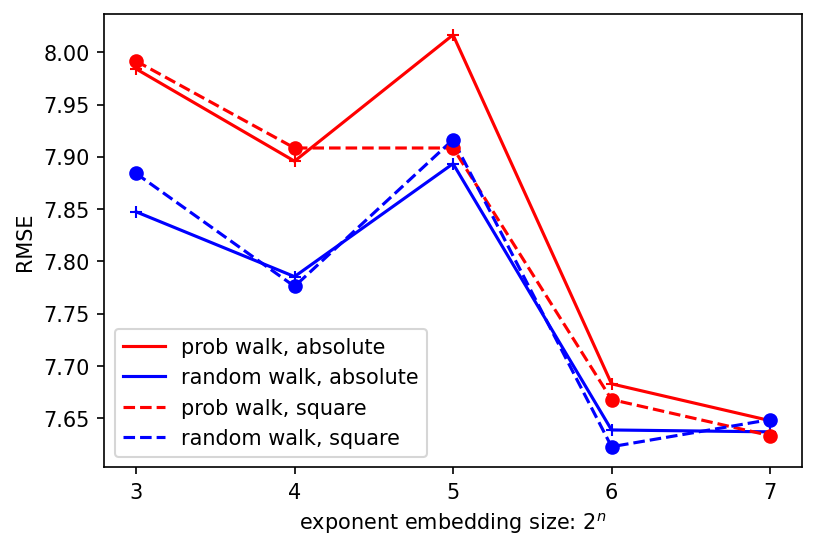

In [9]:
plt.figure(dpi=150)
plt.plot(xlim,prob_walk_abs,'r')
plt.plot(xlim,rand_walk_abs,'b')
plt.plot(xlim,prob_walk_squ,'r--')
plt.plot(xlim,rand_walk_squ,'b--')
plt.plot(xlim,prob_walk_abs,'r+')
plt.plot(xlim,rand_walk_abs,'b+')
plt.plot(xlim,prob_walk_squ,'ro')
plt.plot(xlim,rand_walk_squ,'bo')
plt.legend(['prob walk, absolute','random walk, absolute',\
            'prob walk, square','random walk, square'])
plt.xlabel('exponent embedding size: $2^n$')
plt.ylabel('RMSE')
plt.savefig('fig/distance_prediction.png')